# Laboratorio 3
## 1) Compressione immagini SVD
• La funzione `scipy.linalg.svd` permette di calcolare la decomposizione SVD di una matrice.
• La libreria `skimage` permette di caricare/salvare immagini.
• Se skimage non risulta disponibile, si può installare eseguendo nell’Anaconda prompt il seguente comando: `conda install scikit-image`

### Esercizio 1:
Utilizzando la libreria `skimage`, nello specifico il modulo `data`, caricare e visualizzare un’immagine $A$ (diversa dal cameraman) in scala di grigio di dimensione m x n.
1. Calcolare la matrice $A_p = \sum_{i=1}^p u_i \text{ * } v_i^T \text{ * } \sigma_i$, dove $p ≤ rango(A)$.
2. Visualizzare l’immagine $A_p$.
3. Calcolare l’errore relativo: $\dfrac{\|A − A_p\|_2}{\|A\|_2}$.
4. Calcolare il fattore di compressione: $c_p = \dfrac{1}{p} min(m, n) − 1$.
5. Calcolare e plottare l’errore relativo e il fattore di compressione al variare di $p$.

### Esercizio 2:
Eseguire l’esercizio precedente caricando un’immagine da un file usando la funzione `skimage.io.imread`.

Type(A): <class 'numpy.ndarray'>
A.shape: (300, 451)


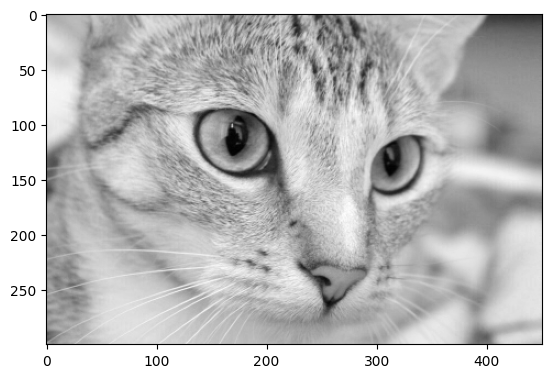

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from skimage import data
from skimage.io import imread

choose = int(input("0 for chelsea, 1 for phantom: "))
while choose != 0 and choose != 1:
  choose = int(input("0 for chelsea, 1 for phantom: "))
A = imread("../assets/phantom.png") if choose else data.chelsea()[..., 0]

print("Type(A):", type(A))
print("A.shape:", A.shape)

plt.imshow(A, cmap="gray")
plt.show()

Shape of U: (300, 300)
Shape of s: (300,)
Shape of V: (451, 300)

L'errore relativo della ricostruzione di A è 0.09063822902513567
Il fattore di compressione è 29.0


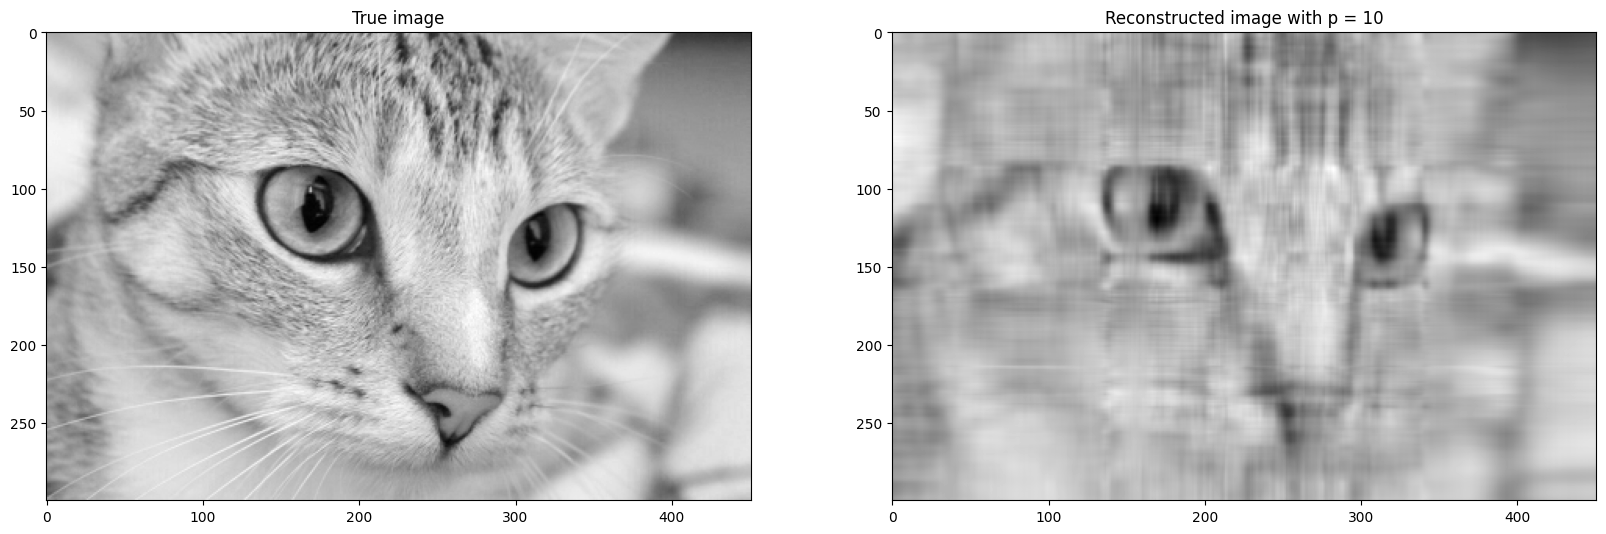

In [86]:
U, s, Vh = scipy.linalg.svd(A, full_matrices=False)
# A = U @ S @ Vh, with S = diag(s)

print("Shape of U:", U.shape)
print("Shape of s:", s.shape) # vector of singular values
print("Shape of V:", Vh.T.shape)
A_p = np.zeros(A.shape)
p_max = 10

for i in range(p_max):
  ui = U[:, i]
  vi = Vh[i, :]
  A_p += s[i] * np.outer(ui, vi)

err_rel = np.linalg.norm(A - A_p) / np.linalg.norm(A)
c = (1 / p_max) * min(A.shape[0], A.shape[1]) - 1

print()
print("L'errore relativo della ricostruzione di A è", err_rel)
print("Il fattore di compressione è", c)

plt.figure(figsize=(20, 10))
fig1 = plt.subplot(1, 2, 1)
fig1.imshow(A, cmap="gray")
plt.title("True image")
fig2 = plt.subplot(1, 2, 2)
fig2.imshow(A_p, cmap="gray")
plt.title("Reconstructed image with p = " + str(p_max))
plt.show()

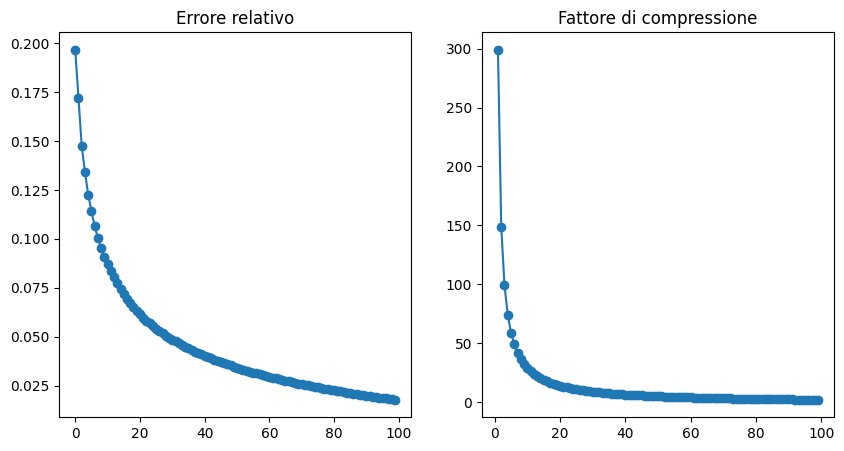

In [87]:
# al variare di p
p_max = 100
A_p = np.zeros(A.shape)
err_rel = np.zeros(p_max)
c = np.zeros(p_max)

for i in range(p_max):
  ui = U[:, i]
  vi = Vh[i, :]
  A_p += s[i] * np.outer(ui, vi)
  err_rel[i] = np.linalg.norm(A - A_p) / np.linalg.norm(A)
  if i > 0:
    c[i] = (1 / i) * min(A.shape[0], A.shape[1]) - 1
c[0] = np.inf

plt.figure(figsize=(10, 5))
fig1 = plt.subplot(1, 2, 1)
fig1.plot(err_rel, "o-")
plt.title("Errore relativo")
fig2 = plt.subplot(1, 2, 2)
fig2.plot(c, "o-")
plt.title("Fattore di compressione")
plt.show()